# Temporary notebook for Outputs

## Imports

In [1]:
import math

import idx2numpy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sb
import umap
import umap.plot
from sklearn.manifold import TSNE

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
 

## MNIST-Exploration

In [2]:
datapath = "../../data"

In [ ]:
filename = datapath + "/raw/train-images.idx3-ubyte"
data = idx2numpy.convert_from_file(filename)

In [4]:
data.shape

(60000, 28, 28)

In [5]:
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
data_reshaped = data.reshape(data.shape[0], -1)

In [8]:
data_reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

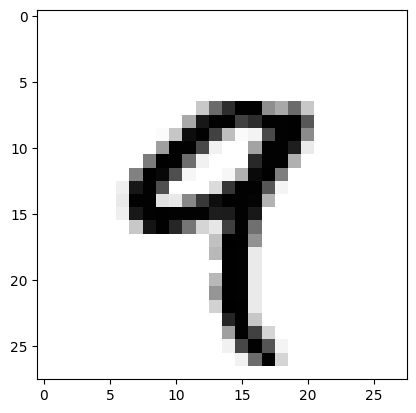

In [9]:
plt.imshow(data[4], cmap=plt.cm.binary)

## Visualisation Helperfunction

In [ ]:
# Input:
#   - results: Computation results as an array of tuples with the form [("<<plot title>>", [<<2-dimensional array>>])],
#              where the 2-dimensional array describes the x- & y-position of each data point & the title should describe the chosen parameter-values
#   - figsize_columns: number of columns which are used to layout the plotted graphs. The number of rows is depending on the number of 'results' and the given 'figsize_columns'.
#   - figsize (optional): Adjusts the width/height of the individual graphs, in case the scaling is different for different computations
# Ouput: The plotted graphs which represent the given data from 'results'


def display_reduction_results(results, figsize_columns, figsize=(15, 15)):
    figsize_rows = math.ceil(len(results) / figsize_columns)
    fig = plt.subplots(figsize_rows, figsize_columns, figsize=figsize)
    # fig.tight_layout(pad=3)

    for i in range(len(results)):
        plt.subplot(figsize_rows, figsize_columns, i + 1).set_title(results[i][0])

        if len(results[i][1][0]) <= 2:
            plt.subplot(figsize_rows, figsize_columns, i + 1).scatter(
                results[i][1][:, 0], results[i][1][:, 1], alpha=0.4
            )
        else:
            plt.subplot(figsize_rows, figsize_columns, i + 1).scatter(
                results[i][1][:, 0],
                results[i][1][:, 1],
                c=results[i][1][:, 2],
                alpha=0.4,
            )

### t-SNE

In [ ]:
perplexities = [10]
tsne_results = []

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(data_reshaped)
    parameter_string = "Perplexity: " + str(perplexity)
    tsne_results.append((parameter_string, tsne))

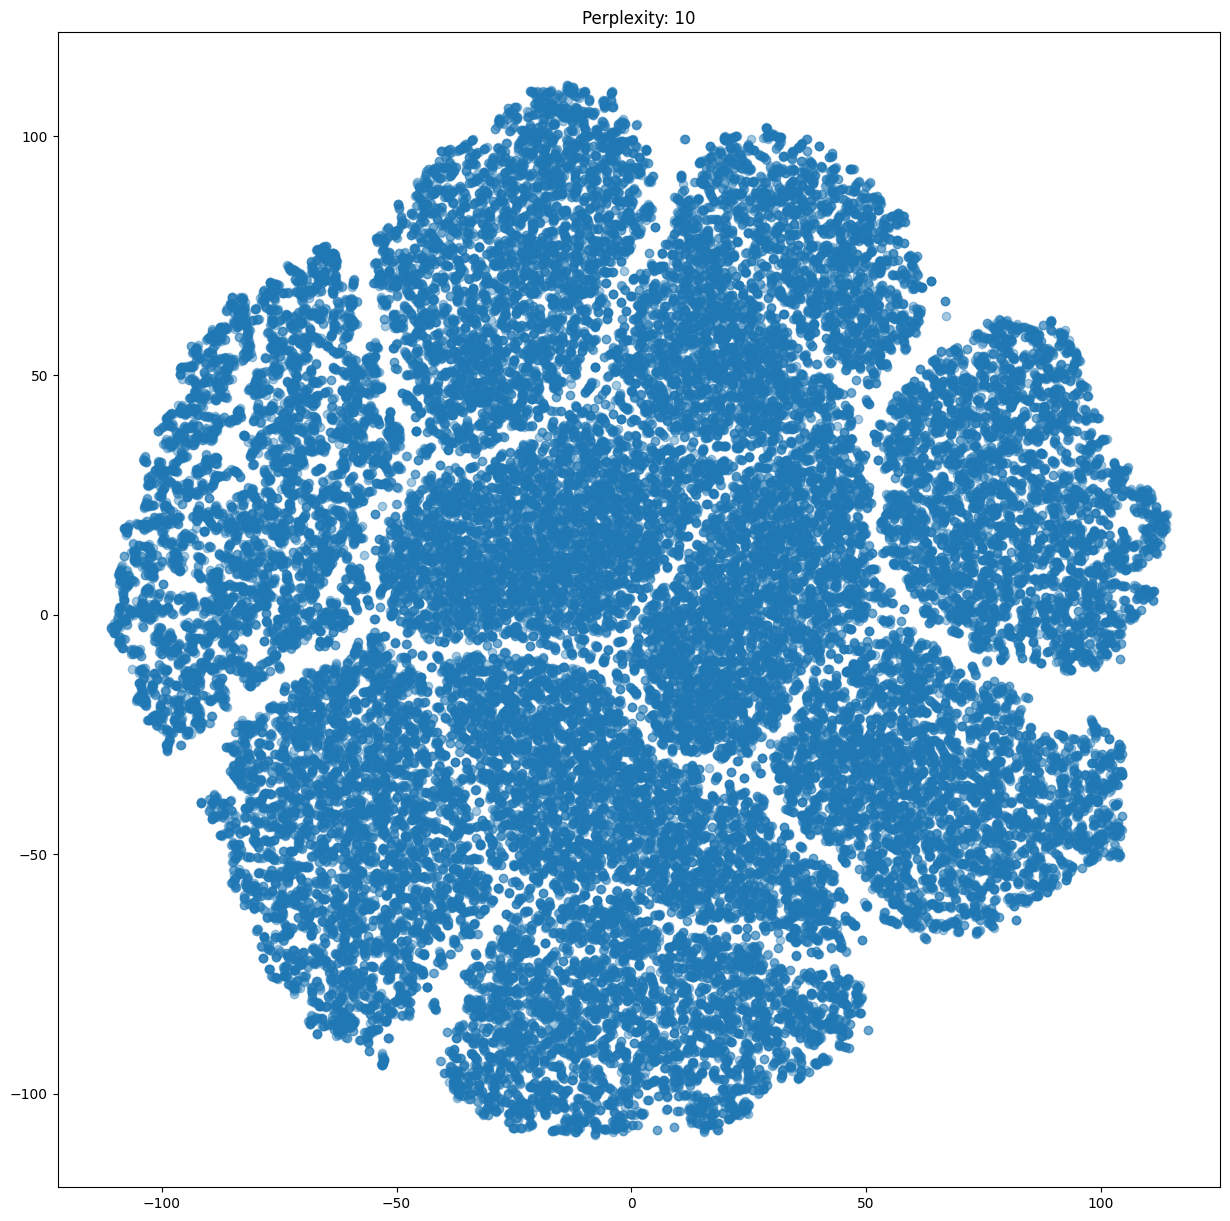

In [12]:
display_reduction_results(tsne_results, 1)

In [13]:
tsne_results[0][1].shape

(60000, 2)

In [ ]:
targetdir = datapath + "/interim/"
np.save(targetdir + "tsne_results.npy", tsne_results[0][1])

### UMAP

In [ ]:
n_neighbors = [15]
umap_results = []

for n_neighbor in n_neighbors:
    umap_reducer = umap.UMAP(n_neighbors=n_neighbor, random_state=0).fit_transform(
        data_reshaped
    )
    parameter_string = "n_neighbors: " + str(n_neighbor)
    umap_results.append((parameter_string, umap_reducer))

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


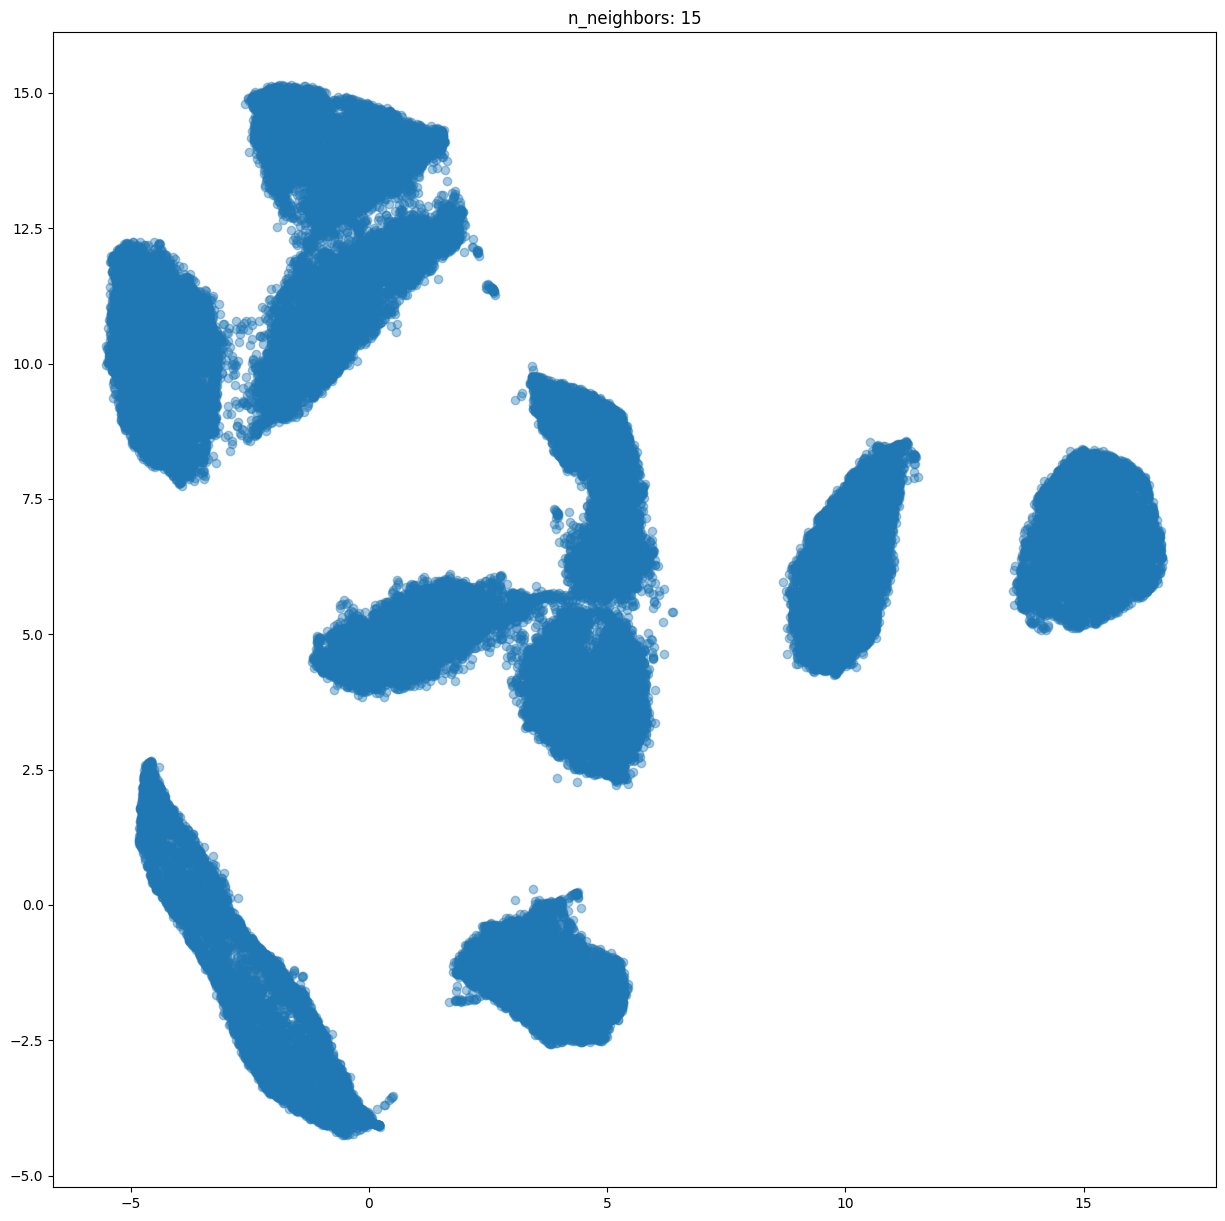

In [16]:
display_reduction_results(umap_results, 1)

In [ ]:
targetdir = datapath + "/interim/"
np.save(targetdir + "umap_results.npy", umap_results[0][1])

## Basic UMAP-Exploration

Dataset: Image Segmentation, available at https://archive.ics.uci.edu/dataset/50/image+segmentation

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
image_segmentation = fetch_ucirepo(id=50)

# data (as pandas dataframes)
X = image_segmentation.data.features
y = image_segmentation.data.targets

# metadata
print(image_segmentation.metadata)

# variable information
print(image_segmentation.variables)

{'uci_id': 50, 'name': 'Image Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/50/image+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/50/data.csv', 'abstract': 'Image data described by high-level numeric-valued attributes, 7 classes', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2310, 'num_features': 19, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5GP4N', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The instances were drawn randomly from a database of 7 outdoor images.  The images were handsegmented to create a classification for every pixel.  \r\n\r\n   Each instance is a 3x3 region.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_dat

In [ ]:
X

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [ ]:
y

,class
0,BRICKFACE
1,BRICKFACE
2,BRICKFACE
3,BRICKFACE
4,BRICKFACE
...,...
205,GRASS
206,GRASS
207,GRASS
208,GRASS


In [ ]:
y["class"].unique()

array(['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'],
      dtype=object)

In [ ]:
labels = pd.Categorical(y["class"]).codes
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int8)

In [ ]:
n_neighbors = [15]
umap_results = []
min_dists = [0.1, 0.5, 1]

for n_neighbor in n_neighbors:
    for min_dist in min_dists:
        umap_reducer = umap.UMAP(
            n_neighbors=n_neighbor, min_dist=min_dist, random_state=0
        )
        embedding = umap_reducer.fit_transform(X)
        parameter_string = (
            "n_neighbors: " + str(n_neighbor) + ", min_dist: " + str(min_dist)
        )
        umap_results.append((parameter_string, embedding))

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be r

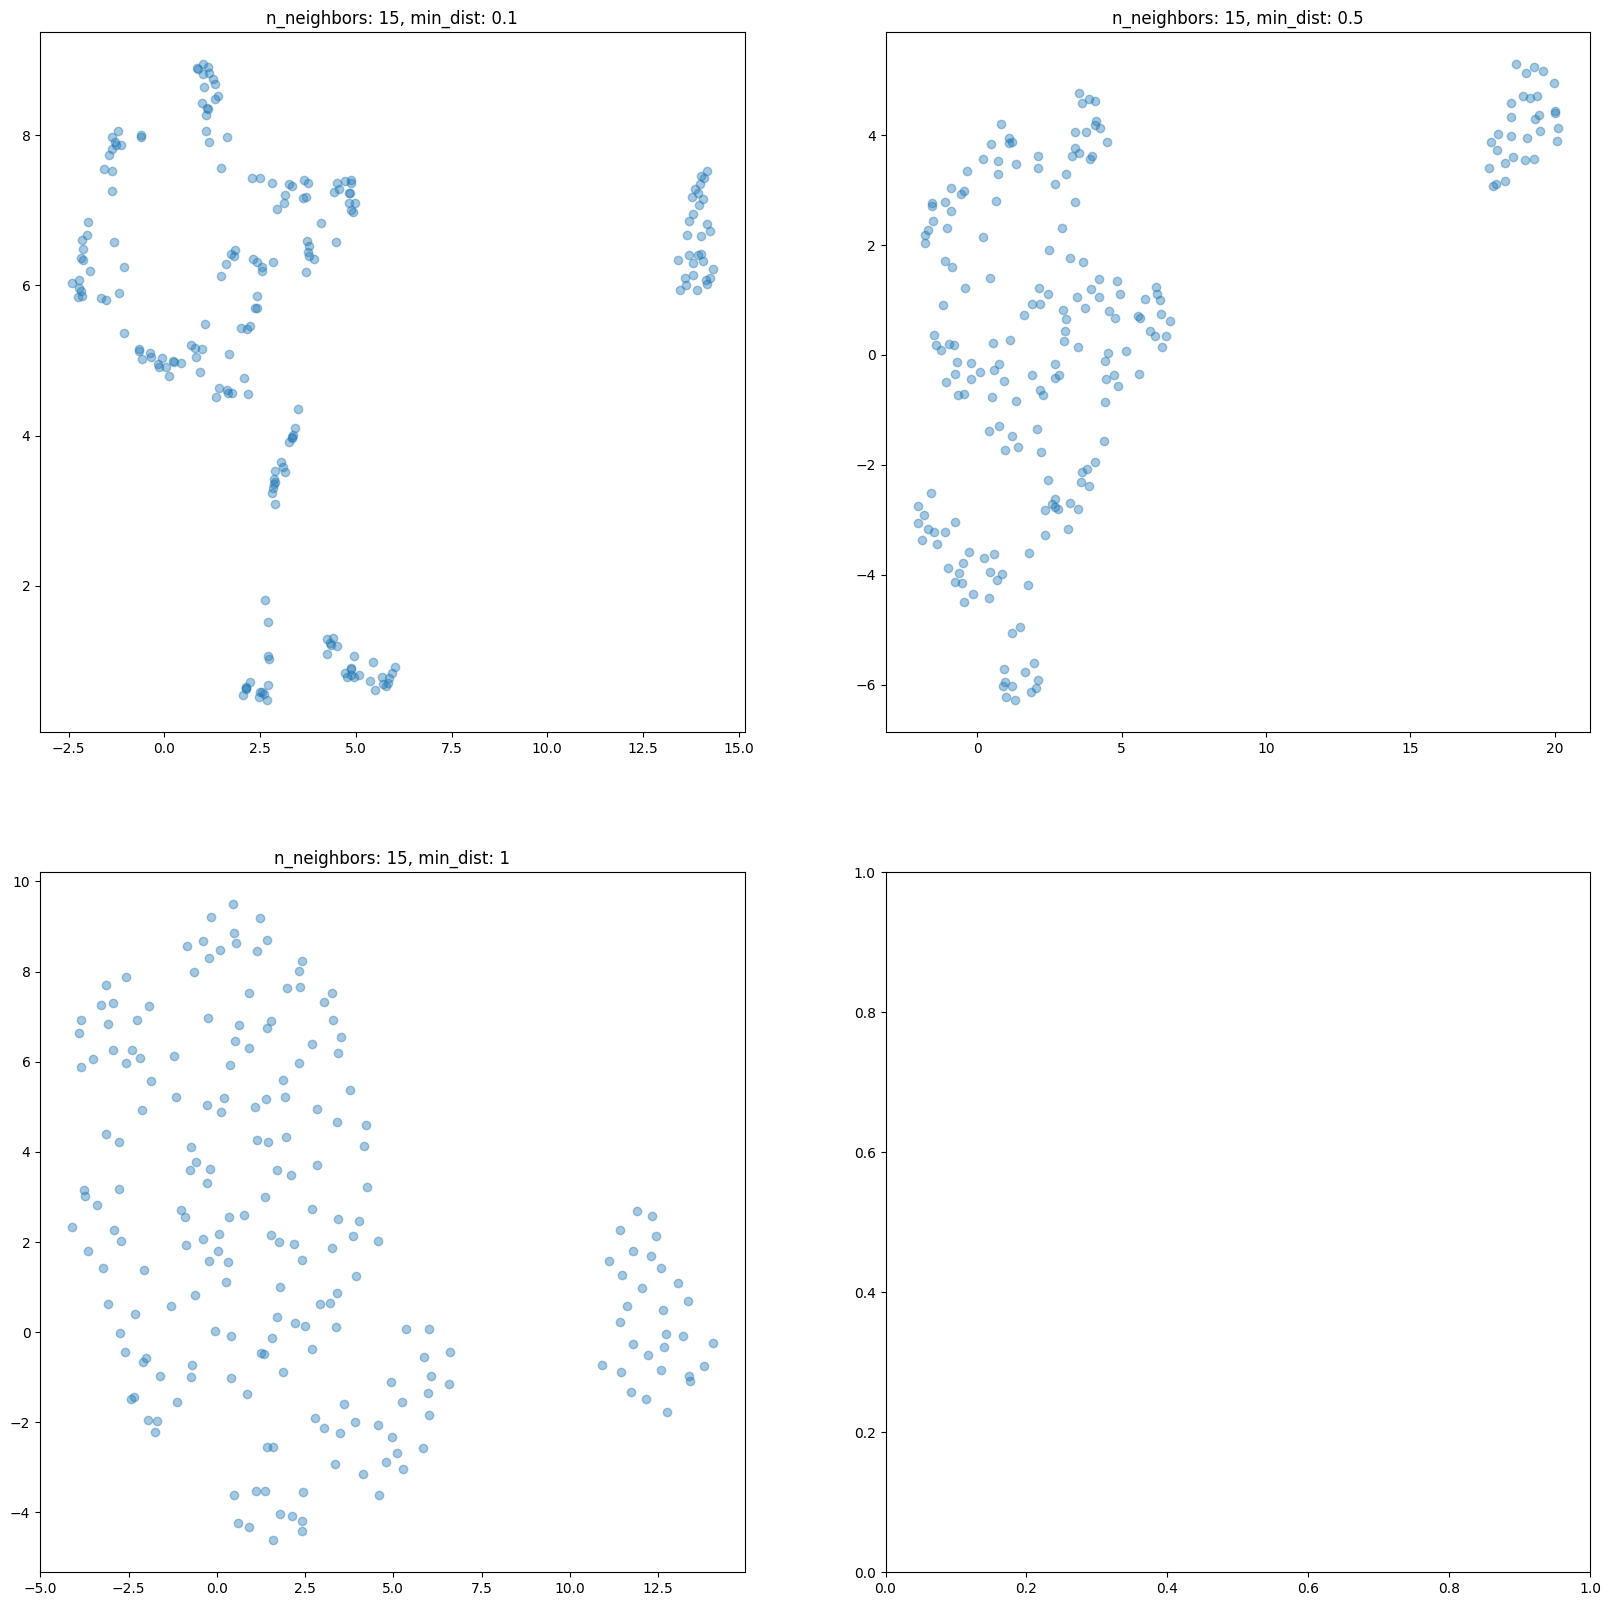

In [ ]:
display_reduction_results(umap_results, figsize_columns=2, figsize=(20, 20))

In [ ]:
umap_mapper = umap.UMAP(n_neighbors=15, min_dist=0.5, random_state=0)
umap_mapper.fit(X)
umap_embedding = umap_mapper.embedding_

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: >

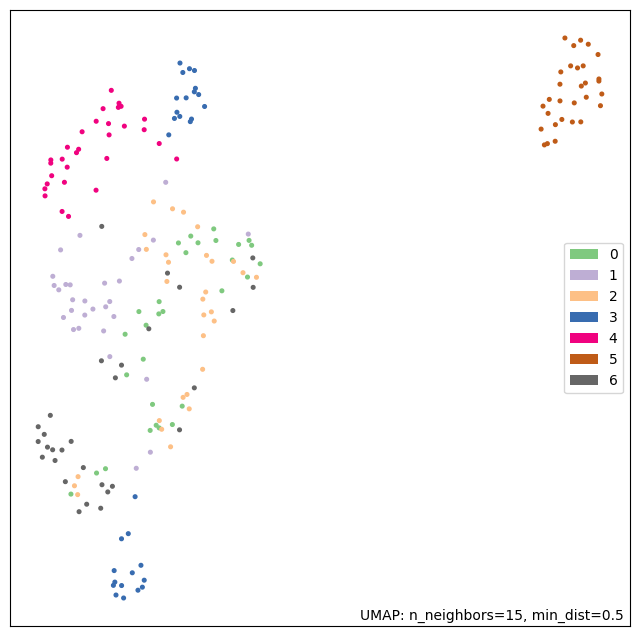

In [ ]:
umap.plot.points(umap_mapper, labels=labels, color_key_cmap="Accent", show_legend=True)

In [ ]:
umap.plot.output_notebook()

Loading BokehJS ...

In [ ]:
umap_interactive_plot = umap.plot.interactive(
    umap_mapper, labels=labels, color_key_cmap="Accent", point_size=4
)
umap.plot.show(umap_interactive_plot)

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\datashader\transfer_functions\__init__.py:337: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - span[0])/(span[1] - span[0])


<Axes: >

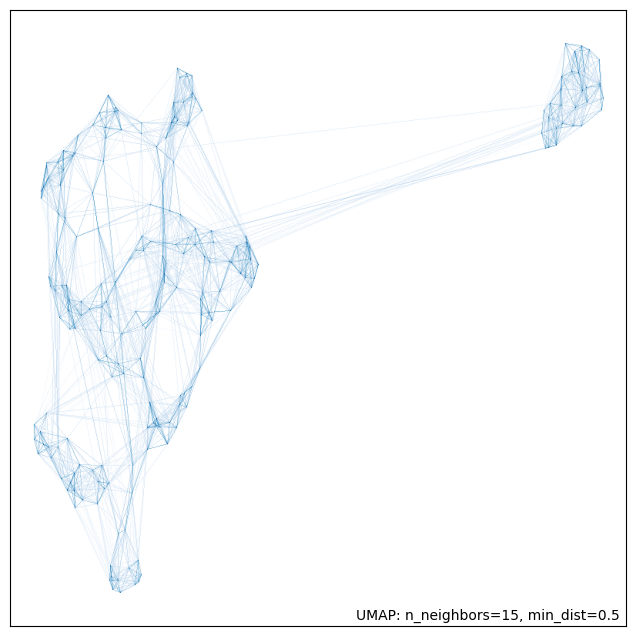

In [ ]:
umap.plot.connectivity(umap_mapper, show_points=True, edge_cmap="Blues")

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

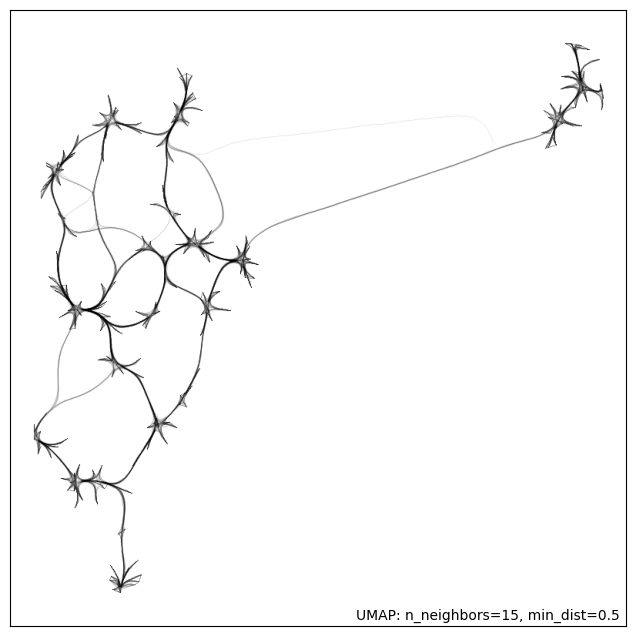

In [ ]:
umap.plot.connectivity(umap_mapper, edge_bundling="hammer")

<Axes: title={'center': 'Colored by neighborhood Jaccard index'}>

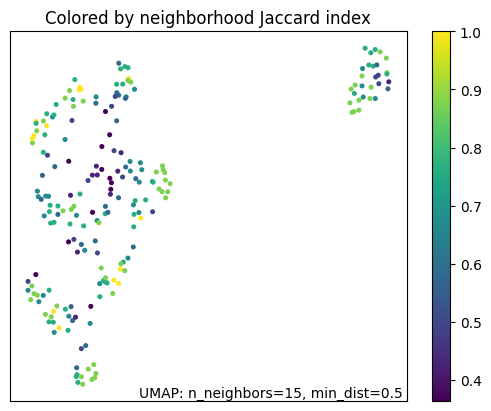

In [ ]:
umap.plot.diagnostic(umap_mapper, diagnostic_type="neighborhood")

### Supervised UMAP

In [ ]:
umap_mapper_supervised = umap.UMAP(n_neighbors=20, min_dist=0.5, random_state=0)
umap_mapper_supervised.fit(X, labels)

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(min_dist=0.5, n_jobs=1, n_neighbors=20, random_state=0, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

<Axes: >

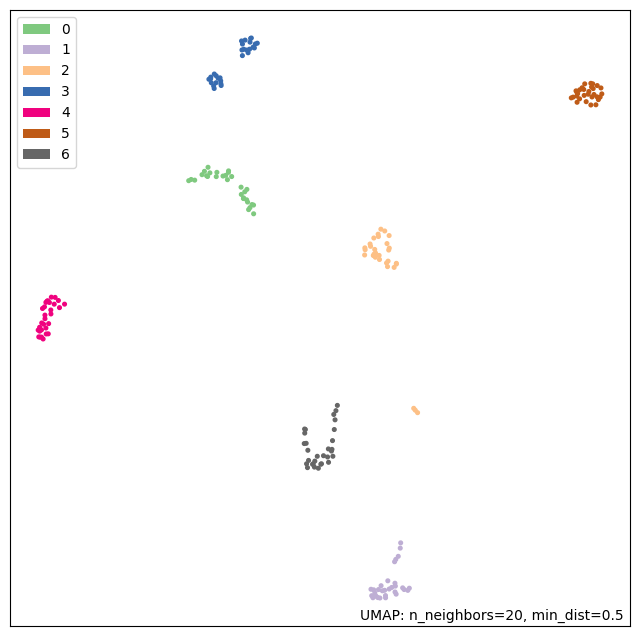

In [ ]:
umap.plot.points(
    umap_mapper_supervised, labels=labels, color_key_cmap="Accent", show_legend=True
)

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\datashader\transfer_functions\__init__.py:337: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - span[0])/(span[1] - span[0])


<Axes: >

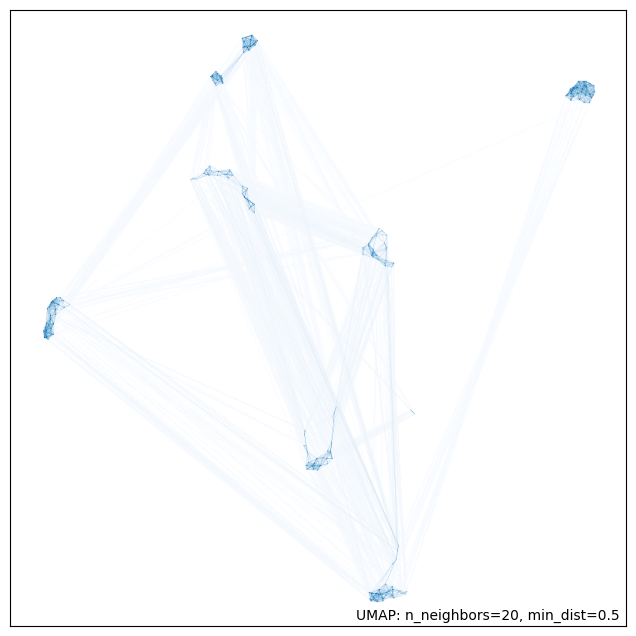

In [ ]:
umap.plot.connectivity(umap_mapper_supervised, show_points=True, edge_cmap="Blues")

## kNN-Exploration

### knn-Graph from original UMAP-embedding

In [24]:
umap_mapper = umap.UMAP(n_neighbors=15, min_dist=0.5, random_state=0)
umap_mapper.fit(X)
umap_embedding = umap_mapper.embedding_
connectivity_umap_knn = umap_mapper.graph_

graph_umap_knn = nx.Graph(connectivity_umap_knn)
edge_weights_umap_knn = [
    graph_umap_knn[u][v]["weight"] for u, v in graph_umap_knn.edges()
]


d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Feature-similarity: saturation-mean

In [ ]:
feature_similarity = "saturation-mean"
labels = pd.Categorical(y["class"]).codes


In [26]:
# kNN for saturation-mean
from sklearn.neighbors import kneighbors_graph

connectivity_saturation_knn = kneighbors_graph(
    X.loc[:, [feature_similarity]], n_neighbors=3, mode="distance"
)

graph_saturation_knn = nx.Graph(connectivity_saturation_knn)
edge_weights_saturation_knn = [
    graph_saturation_knn[u][v]["weight"] for u, v in graph_saturation_knn.edges()
]


In [ ]:
def display_graphs(results, figsize_columns, figsize=(15, 15)):
    figsize_rows = math.ceil(len(results) / figsize_columns)
    fig, axs = plt.subplots(figsize_rows, figsize_columns, figsize=figsize)

    axs = axs.flatten()

    for i in range(len(axs)):
        if i < len(results):
            nx.draw(
                results[i][1],
                ax=axs[i],
                pos=umap_embedding,
                node_size=30,
                node_color=labels,
                edge_color=results[i][2],
                width=0.4,
                alpha=0.6,
                edge_cmap=plt.cm.Accent,
            )

            axs[i].set_title(results[i][0], fontsize=10)
            # axs[i].text(
            #     0.5,
            #     -0.1,
            #     results[i][0],
            #     wrap=True,
            #     horizontalalignment="center",
            #     fontsize=10,
            #     transform=axs[i].transAxes
            # )
        else:
            fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()


def generate_pairwise_threshold_graphs(similarity_matrix, threshold):
    for i in range(len(similarity_matrix)):
        similarity_matrix[i] = [
            x if x >= threshold else 0 for x in similarity_matrix[i]
        ]

    graph_saturation_pairwise = nx.Graph(similarity_matrix)
    edge_weights = [
        graph_saturation_pairwise[u][v]["weight"]
        for u, v in graph_saturation_pairwise.edges()
    ]
    return graph_saturation_pairwise, edge_weights

<Axes: ylabel='Count'>

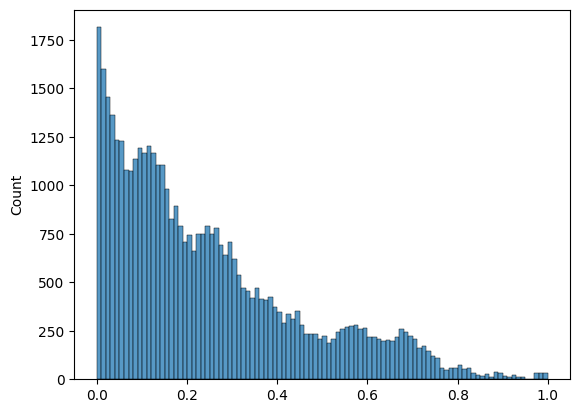

In [ ]:
# Pairwise similarity for saturation-mean
from sklearn.metrics import pairwise_distances

connectivity_saturation_pairwise = pairwise_distances(
    X.loc[:, [feature_similarity]], metric="manhattan"
)

sb.histplot(connectivity_saturation_pairwise.flatten(), bins=100)


In [51]:
graph_saturation_pairwise, edge_weights_saturation_pairwise = (
    generate_pairwise_threshold_graphs(connectivity_saturation_pairwise.copy(), 0)
)
graph_saturation_pairwise_02, edge_weights_saturation_pairwise_02 = (
    generate_pairwise_threshold_graphs(connectivity_saturation_pairwise.copy(), 0.2)
)
graph_saturation_pairwise_05, edge_weights_saturation_pairwise_05 = (
    generate_pairwise_threshold_graphs(connectivity_saturation_pairwise.copy(), 0.5)
)
graph_saturation_pairwise_07, edge_weights_saturation_pairwise_07 = (
    generate_pairwise_threshold_graphs(connectivity_saturation_pairwise.copy(), 0.7)
)


### Display Connectivity-Graphs

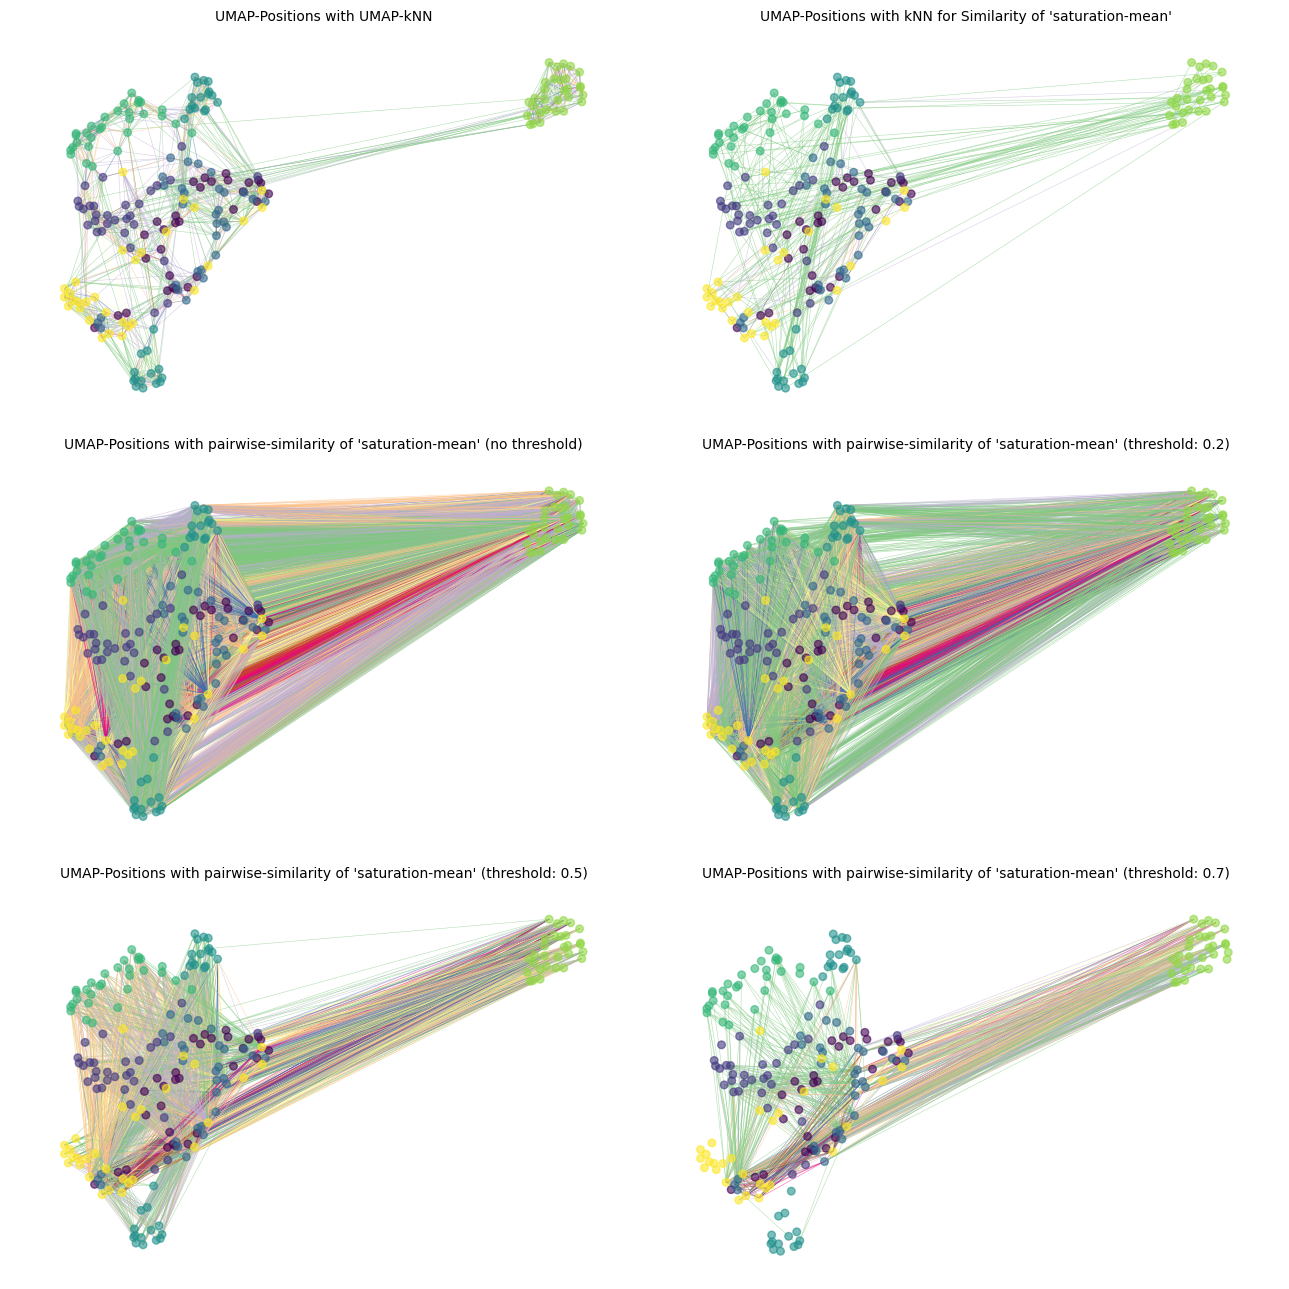

In [ ]:
display_graphs(
    [
        (
            "UMAP-Positions with UMAP-kNN",
            graph_umap_knn,
            edge_weights_umap_knn,
        ),
        (
            "UMAP-Positions with kNN for Similarity of 'saturation-mean'",
            graph_saturation_knn,
            edge_weights_saturation_knn,
        ),
        (
            "UMAP-Positions with pairwise-similarity of 'saturation-mean' (no threshold)",
            graph_saturation_pairwise,
            edge_weights_saturation_pairwise,
        ),
        (
            "UMAP-Positions with pairwise-similarity of 'saturation-mean' (threshold: 0.2)",
            graph_saturation_pairwise_02,
            edge_weights_saturation_pairwise_02,
        ),
        (
            "UMAP-Positions with pairwise-similarity of 'saturation-mean' (threshold: 0.5)",
            graph_saturation_pairwise_05,
            edge_weights_saturation_pairwise_05,
        ),
        (
            "UMAP-Positions with pairwise-similarity of 'saturation-mean' (threshold: 0.7)",
            graph_saturation_pairwise_07,
            edge_weights_saturation_pairwise_07,
        ),
    ],
    2,
    (13, 13),
)
